In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta', 'Microsoft JhengHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# =========================================================
# 1️⃣ 讀取資料
# =========================================================
train = pd.read_csv("train.csv")
print(f"✅ 資料筆數：{len(train)}")
print(f"✅ 欄位數量：{len(train.columns)}")
print(train.head(3))
print(train.info())

# =========================================================
# 2️⃣ 缺失值與基本統計
# =========================================================
print("\n📊 缺失值統計：")
print(train.isna().sum()[train.isna().sum() > 0])

print("\n📊 數值欄位統計摘要：")
print(train.describe().T)

✅ 資料筆數：97992
✅ 欄位數量：21
   rally_uid  sex  match  numberGame  rally_id  strickNumber  scoreSelf  \
0          1    1      1           1         1             1          0   
1          1    1      1           1         1             2          0   
2          1    1      1           1         1             3          0   

   scoreOther  serverGetPoint  gamePlayerId  ...  serveId  serveNumber  \
0           0               1             1  ...        1            0   
1           0               1             2  ...        1            1   
2           0               1             1  ...        1            1   

   strickId  handId  strengthId  spinId  pointId  actionId  let  positionId  
0         1       1           3       5        4         0    0           0  
1         2       2           2       1        9         4    0           0  
2         4       1           1       1        7         1    0           0  

[3 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeI

C:\Users\user\AppData\Local\Temp\ipykernel_22364\781759514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=t, palette="viridis")


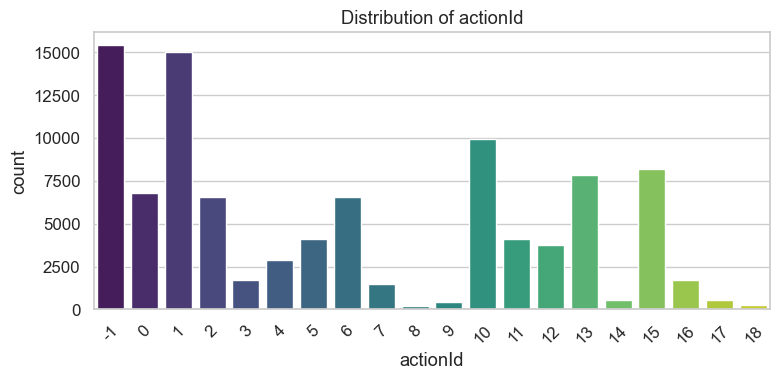


actionId 類別比例：
actionId
-1     0.157
 1     0.153
 10    0.101
 15    0.084
 13    0.080
 0     0.069
 6     0.067
 2     0.067
 11    0.042
 5     0.042
 12    0.038
 4     0.029
 3     0.017
 16    0.017
 7     0.015
 14    0.006
 17    0.005
 9     0.004
 18    0.003
 8     0.002
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_22364\781759514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=t, palette="viridis")


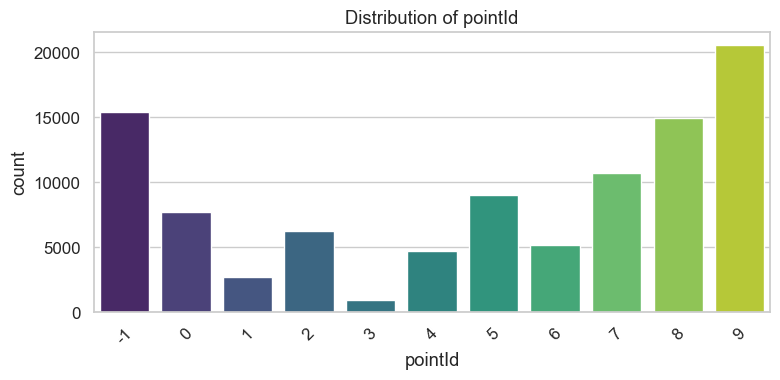


pointId 類別比例：
pointId
 9    0.210
-1    0.157
 8    0.152
 7    0.109
 5    0.092
 0    0.079
 2    0.064
 6    0.053
 4    0.048
 1    0.027
 3    0.010
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_22364\781759514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=t, palette="viridis")


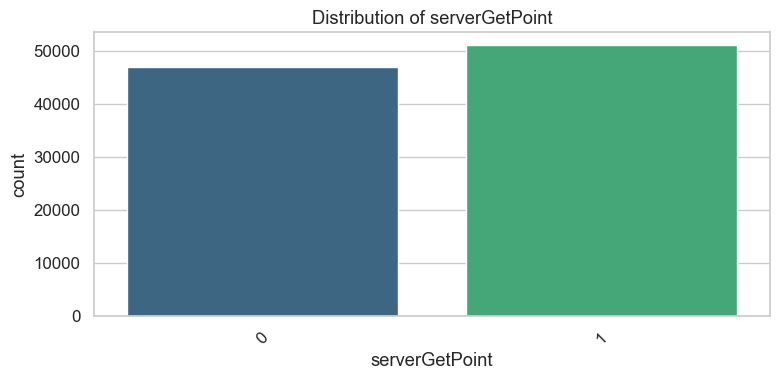


serverGetPoint 類別比例：
serverGetPoint
1    0.52
0    0.48
Name: proportion, dtype: float64


In [18]:
# =========================================================
# 3️⃣ 標籤分布 (三個任務)
# =========================================================
targets = ["actionId", "pointId", "serverGetPoint"]
for t in targets:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train, x=t, palette="viridis")
    plt.title(f"Distribution of {t}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"\n{t} 類別比例：\n{train[t].value_counts(normalize=True).round(3)}")


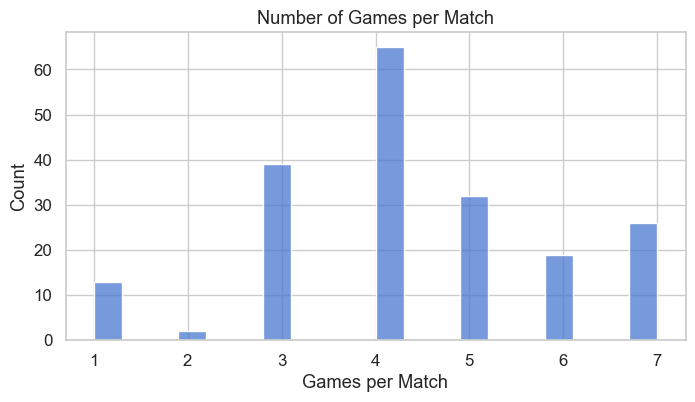

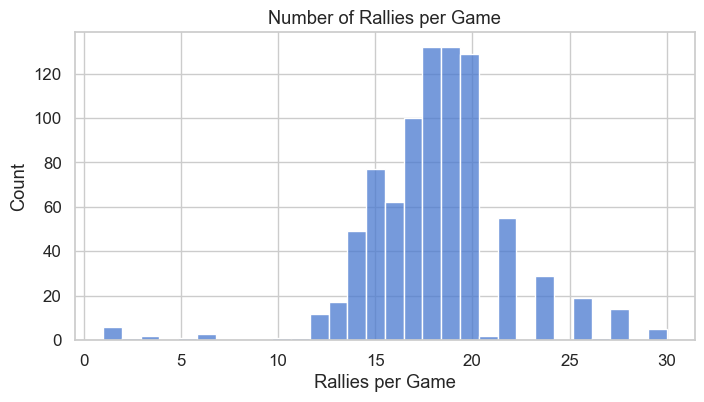

平均每場比賽局數：4.34
平均每局回合數：18.15


In [19]:
# =========================================================
# 4️⃣ 階層結構確認
# =========================================================
# 每場比賽有幾局、每局有幾回合
match_game_counts = train.groupby("match")["numberGame"].nunique()
game_rally_counts = train.groupby(["match", "numberGame"])["rally_id"].nunique()

plt.figure(figsize=(8,4))
sns.histplot(match_game_counts, bins=20)
plt.title("Number of Games per Match")
plt.xlabel("Games per Match")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(game_rally_counts, bins=30)
plt.title("Number of Rallies per Game")
plt.xlabel("Rallies per Game")
plt.show()

print(f"平均每場比賽局數：{match_game_counts.mean():.2f}")
print(f"平均每局回合數：{game_rally_counts.mean():.2f}")

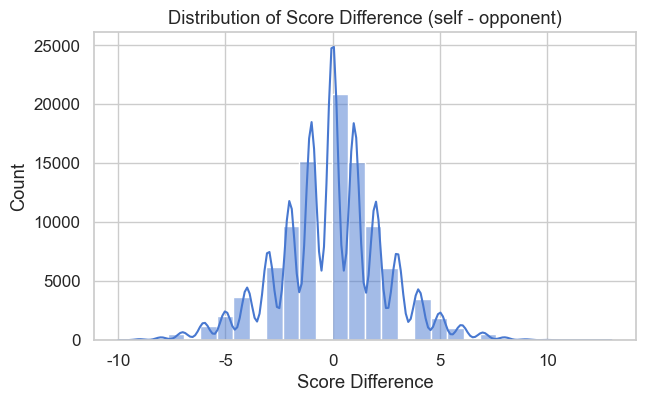

In [20]:
# =========================================================
# 5️⃣ 基礎比賽狀態統計
# =========================================================
train["score_diff"] = train["scoreSelf"] - train["scoreOther"]

plt.figure(figsize=(7,4))
sns.histplot(train["score_diff"], kde=True, bins=30)
plt.title("Distribution of Score Difference (self - opponent)")
plt.xlabel("Score Difference")
plt.show()

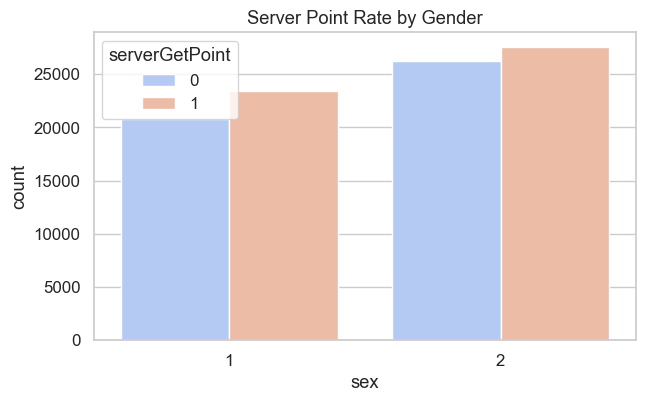

In [21]:
# =========================================================
# 6️⃣ 性別差異分析
# =========================================================
plt.figure(figsize=(7,4))
sns.countplot(data=train, x="sex", hue="serverGetPoint", palette="coolwarm")
plt.title("Server Point Rate by Gender")
plt.show()

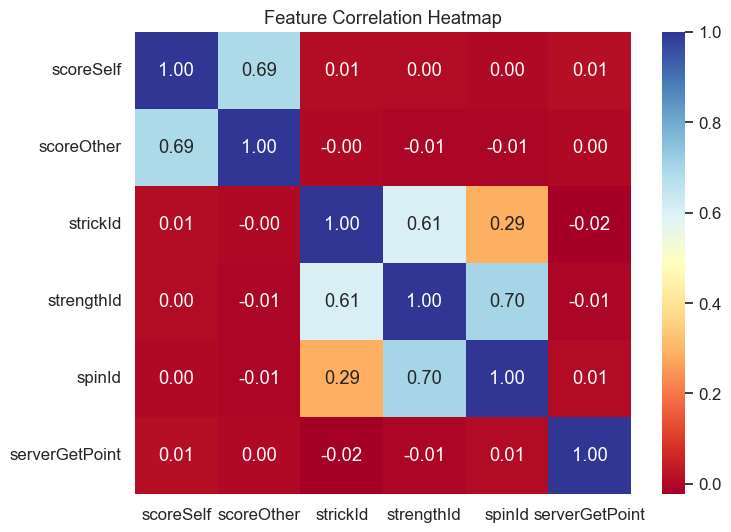

In [25]:
# =========================================================
# 7️⃣ 特徵關聯熱圖
# =========================================================
corr_cols = ["scoreSelf","scoreOther","strickId","strengthId","spinId","serverGetPoint"]
corr = train[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22364\312661383.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_score.index, y=action_score.values, palette="Spectral")


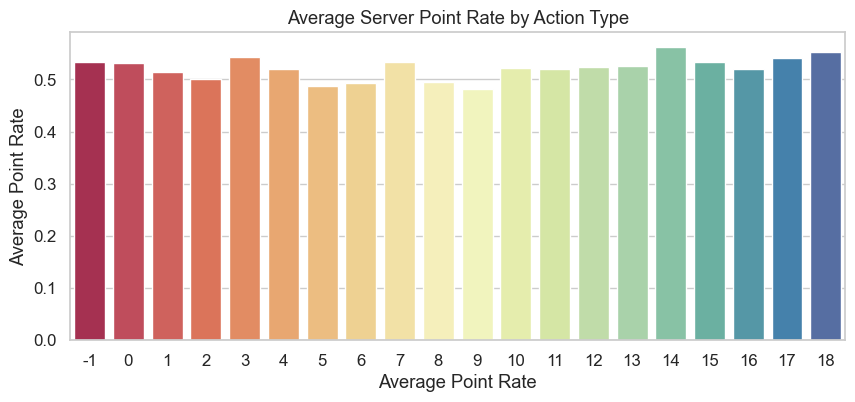

In [26]:
# =========================================================
# 8️⃣ 不同動作與得分關係
# =========================================================
action_score = train.groupby("actionId")["serverGetPoint"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=action_score.index, y=action_score.values, palette="Spectral")
plt.title("Average Server Point Rate by Action Type")
plt.ylabel("Average Point Rate")
plt.xlabel("Average Point Rate")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_22364\1195835389.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x="rally_progress", y="serverGetPoint", ci=None)


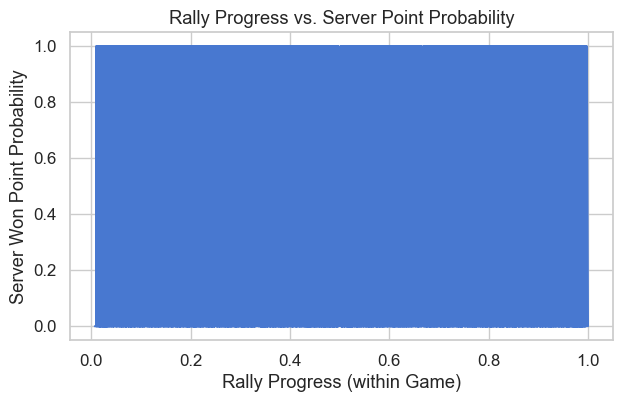


✅ 基礎資料分析完成！


In [27]:
# =========================================================
# 9️⃣ 局內進展 vs 得分率
# =========================================================
df_rally_progress = train.groupby(["match", "numberGame"])["rally_id"].rank(pct=True)
train["rally_progress"] = df_rally_progress

plt.figure(figsize=(7,4))
sns.lineplot(data=train, x="rally_progress", y="serverGetPoint", ci=None)
plt.title("Rally Progress vs. Server Point Probability")
plt.xlabel("Rally Progress (within Game)")
plt.ylabel("Server Won Point Probability")
plt.show()

print("\n✅ 基礎資料分析完成！")
